## Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
%load_ext autoreload
%autoreload 2

## Assignment

### Pre-processing

In [2]:
# Takes a long time; only run once
LOAD_DATA_MODE = {0: "DER", 1: "PRI", 2: "ALL"} # Allows us to switch between DER/PLI values or all
y, x = load_data(train=True, mode = LOAD_DATA_MODE[0]) # Load data (DER)
y_indexes, x_test = load_data(train=False, mode = LOAD_DATA_MODE[0])

In [3]:
x_tr, x_te, y_tr, y_te = split_data(x, y, 0.8, np.random.seed())
x_tr = replace_min_999_by_col_mean(x_tr) # Handle invalid values
x_te = replace_min_999_by_col_mean(x_te)

x_tr = build_poly_2(x_tr) # Poly exp deg=2
x_te = build_poly_2(x_te)

x_tr, mean_x_tr, std_x_tr = standardize(x_tr) # Standardize x
x_te, mean_x_te, std_x_te = standardize(x_te)

tx_tr = add_x_bias(x_tr) # Add bias after normalisation to avoid NaNs
tx_te = add_x_bias(x_te)

In [4]:
print(tx_tr.shape)
print(tx_te.shape)

(200000, 105)
(50000, 105)


### Linear regression using gradient descent

In [ ]:
# We run GD step times per epoch, for epochs epochs (same as running GD for epochs*step just lets us print intermediate results)
w_GD, epochs, step, gamma = np.zeros(105), 100, 150, 1e-2
loss_tr_GD = []
loss_te_GD = []
for i in range((int)(epochs)):
    w_GD, loss_tr = mean_squared_error_gd(y_tr, tx_tr, w_GD, step, gamma)
    loss_te = compute_mse(y_te, tx_te, w_GD)
    loss_tr_GD.append(loss_tr)
    loss_te_GD.append(loss_te)
    print(f"Epoch {i} : Training loss: {loss_tr} Test loss: {loss_te}")

#### Plotting the resulting losses

In [ ]:
plt.plot(range(len(loss_tr_GD)), loss_tr_GD, c='red')
plt.plot(range(len(loss_te_GD)), loss_te_GD, c='blue')

#### Calculating the accuracy on the test set (with predictions = 0 or 1)

In [ ]:
best_threshold, best_accruacy = threshold_selection_and_plot(tx_te, y_te, w_GD)
print("best threshold=", best_threshold,"\nbest accruacy=",best_accruacy)

#### Saving for a submission

In [ ]:
x_test_GD = replace_min_999_by_col_mean(x_test) # Handle invalid values

x_test_GD = build_poly_2(x_test_GD) # Build polynomial expansion

x_test_GD, mean_x_test_GD, std_x_test_GD = standardize(x_test_GD) # Standardize x

tx_test_GD = add_x_bias(x_test_GD)

y_hat = build_prediction(tx_test_GD, w_GD, 0.38, True)
write_to_csv(np.column_stack((y_indexes, y_hat)), "test_output.csv") # Accuracy 0.745 F1 0.573

### Linear regression using stochastic gradient descent

In [ ]:
w_SGD, epochs, step, gamma = np.zeros(105), 100, 150, 1e-2
for i in range((int)(epochs)):
    w_SGD, loss_tr = mean_squared_error_sgd(y_tr, tx_tr, w_SGD, step, gamma)
    loss_te = compute_mse(y_te, tx_te, w_SGD)
    print(f"Epoch {i} : Training loss: {loss_tr} Test loss: {loss_te}")

#### Calculating the accuracy on the test set (with predictions = 0 or 1)

In [ ]:
best_threshold, best_accruacy = threshold_selection_and_plot(tx_te, y_te, w_SGD)
print("best threshold=", best_threshold,"\nbest accruacy=",best_accruacy)

#### Saving for a submission

In [ ]:
x_test_SGD = replace_min_999_by_col_mean(x_test) # Handle invalid values

x_test_SGD = build_poly_2(x_test_SGD) # Build polynomial expansion

x_test_SGD, mean_x_test_SGD, std_x_test_SGD = standardize(x_test_SGD) # Standardize x

tx_test_SGD = add_x_bias(x_test_SGD)

y_hat = build_prediction(tx_test_SGD, w_SGD, 0.3783, True)
write_to_csv(np.column_stack((y_indexes, y_hat)), "test_output.csv") # Accuracy 0.753 F1 0.598

### Least squares

In [5]:
w_LS, loss_tr = least_squares(y_tr, tx_tr)
loss_te = compute_mse(y_te, tx_te, w_LS)
print(f"Training loss: {loss_tr}\nTest loss: {loss_te}")

Training loss: 0.07833258394751136
Test loss: 0.08397215867860833


best threshold= 0.47647647647647645 
best accruacy= 0.7756000000000001


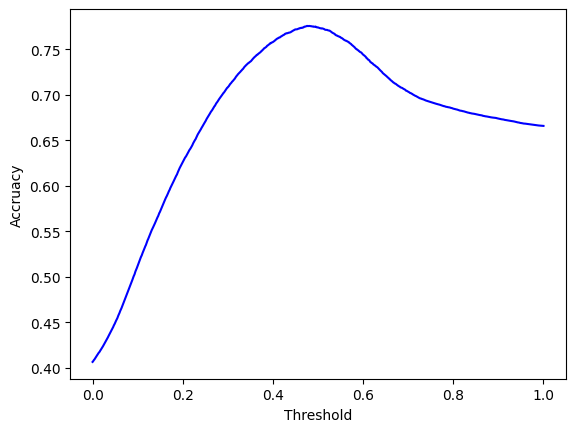

In [6]:
best_threshold, best_accruacy = threshold_selection_and_plot(tx_te, y_te, w_LS)
print("best threshold=", best_threshold,"\nbest accruacy=",best_accruacy)

#### Saving for a submission

In [ ]:
x_test_LS = replace_min_999_by_col_mean(x_test) # Handle invalid values

x_test_LS = build_poly_2(x_test_LS) # Build polynomial expansion

x_test_LS, mean_x_test_LS, std_x_test_LS = standardize(x_test_LS) # Standardize x

tx_test_LS = add_x_bias(x_test_LS)

y_hat = build_prediction(tx_test_LS, w_LS, 0.3783, True)
write_to_csv(np.column_stack((y_indexes, y_hat)), "test_output.csv") # Accuracy 0.748 F1 0.684

### Ridge regression

In [7]:
lambda_ = 0.00233
w_REG, loss_tr = ridge_regression(y_tr, tx_tr, lambda_)
print(f"Training loss: {loss_tr}\n")

Training loss: 0.0786334597424911



In [8]:
# (very) Long running
ridge_lambdas_and_threshold (y_tr, tx_tr, y_te, tx_te)

KeyboardInterrupt: 

#### Saving for a submission

In [ ]:
x_test_REG = replace_min_999_by_col_mean(x_test) # Handle invalid values

x_test_REG = build_poly_2(x_test_REG) # Build polynomial expansion

x_test_REG, mean_x_test_REG, std_x_test_REG = standardize(x_test_REG) # Standardize x

tx_test_REG = add_x_bias(x_test_REG)

y_hat = build_prediction(tx_test_REG, w_REG, 0.4854, True)
write_to_csv(np.column_stack((y_indexes, y_hat)), "test_output.csv") # Accuracy 0.778 F1 0.654

### Logistic regression using gradient descent or SGD (y ∈ {0, 1})

In [9]:
# We run GD step times per epoch, for epochs epochs (same as running GD for epochs*step just lets us print intermediate results)
w_GD_log, epochs, step, gamma = np.zeros(105), 30, 150, 0.5
loss_tr_GD_log = []
loss_te_GD_log = []
w_GD_log_LIST = []
for i in range((int)(epochs)):
    w_GD_log, loss_tr = logistic_regression(y_tr, tx_tr, w_GD_log, step, gamma)
    loss_te = compute_log_loss(y_te, tx_te, w_GD_log)
    loss_tr_GD_log.append(loss_tr)
    loss_te_GD_log.append(loss_te)
    w_GD_log_LIST.append(w_GD_log)
    print(f"Epoch {i} : Training loss: {loss_tr} Test loss: {loss_te}")

Epoch 0 : Training loss: 0.46765380009633845 Test loss: 0.4652509284741308
Epoch 1 : Training loss: 0.4562804738680431 Test loss: 0.45519311351587505
Epoch 2 : Training loss: 0.4503335736298095 Test loss: 0.45012415087069546
Epoch 3 : Training loss: 0.4465035453860584 Test loss: 0.44693920932384196
Epoch 4 : Training loss: 0.4437926736949704 Test loss: 0.44476680468895025
Epoch 5 : Training loss: 0.4417627560523817 Test loss: 0.44321680095081994
Epoch 6 : Training loss: 0.44018072478342885 Test loss: 0.44208474238562395
Epoch 7 : Training loss: 0.4389095995066811 Test loss: 0.441250821921176
Epoch 8 : Training loss: 0.43786387329054755 Test loss: 0.44063817179636416
Epoch 9 : Training loss: 0.43698743688989333 Test loss: 0.44019454362959043
Epoch 10 : Training loss: 0.4362418096269205 Test loss: 0.43988287652881963
Epoch 11 : Training loss: 0.43559959248609387 Test loss: 0.43967595298063167
Epoch 12 : Training loss: 0.4350406618894011 Test loss: 0.43955325044188936
Epoch 13 : Training 

#### Plotting the resulting losses

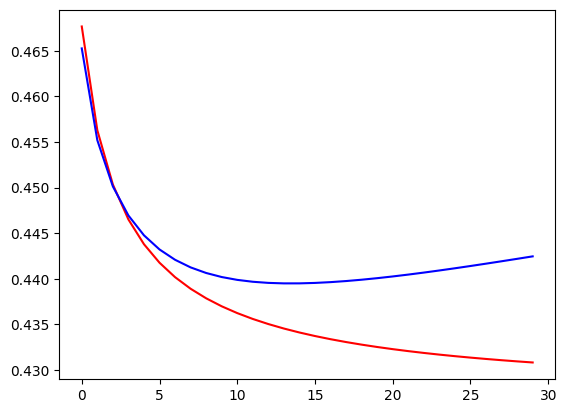

In [10]:
plt.plot(range(len(loss_tr_GD_log)), loss_tr_GD_log, c='red')
plt.plot(range(len(loss_te_GD_log)), loss_te_GD_log, c='blue')

#### Calculating the accuracy on the test set (with predictions = -1 or 1)

best threshold= 0.48848848848848847 
best accruacy= 0.8062199999999999


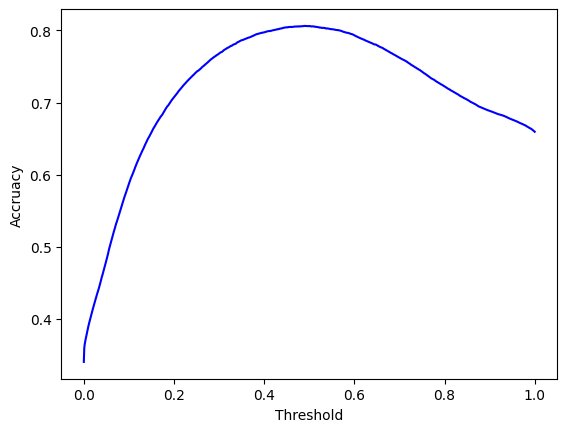

In [11]:
w_GD_log = w_GD_log_LIST[np.argmin(loss_te_GD_log)] # Best W

best_threshold_log_reg, best_accruacy = threshold_selection_and_plot_log(tx_te, y_te, w_GD_log)
print("best threshold=", best_threshold_log_reg,"\nbest accruacy=",best_accruacy)

In [ ]:
x_test_log = replace_min_999_by_col_mean(x_test) # Handle invalid values

x_test_log = build_poly_2(x_test_log)

x_test_log, mean_x_test_log, std_x_test_log = standardize(x_test_log) # Standardize x

tx_test_log = add_x_bias(x_test_log)

y_hat = build_prediction_log(tx_test_log, w_GD_log, threshold=best_threshold_log_reg, minus_one = True)
write_to_csv(np.column_stack((y_indexes, y_hat)), "test_output.csv") # Accuracy 0.804 F1 0.697

### Regularized logistic regression using gradient descent or SGD (y ∈ {0, 1}, with regularization term λ∥w∥**2)

In [ ]:
# We run GD step times per epoch, for epochs epochs (same as running GD for epochs*step just lets us print intermediate results)
lambda_reg = 1e-4
w_GD_reg_log, epochs, step, gamma = np.zeros(105), 30, 150, 0.5
loss_tr_GD_reg_log = []
loss_te_GD_reg_log = []
w_GD_reg_log_LIST = []
for i in range((int)(epochs)):
    w_GD_reg_log, loss_tr = reg_logistic_regression(y_tr, tx_tr, lambda_reg, w_GD_reg_log, step, gamma)
    loss_te = compute_log_loss(y_te, tx_te, w_GD_reg_log)
    loss_tr_GD_reg_log.append(loss_tr)
    loss_te_GD_reg_log.append(loss_te)
    w_GD_reg_log_LIST.append(w_GD_reg_log)
    print(f"Epoch {i} : Training loss: {loss_tr} Test loss: {loss_te}")

Epoch 0 : Training loss: 0.46774588461884786 Test loss: 0.4653355484143271
Epoch 1 : Training loss: 0.45645294313829504 Test loss: 0.4553383611240833
Epoch 2 : Training loss: 0.4505756449462602 Test loss: 0.4503183053484146
Epoch 3 : Training loss: 0.4468064264506602 Test loss: 0.44717271273906783
Epoch 4 : Training loss: 0.4441481104949801 Test loss: 0.4450300604364536
Epoch 5 : Training loss: 0.44216370358745627 Test loss: 0.4435013494814108
Epoch 6 : Training loss: 0.44062166269549885 Test loss: 0.4423824778564743
Epoch 7 : Training loss: 0.43938613344313887 Test loss: 0.44155388465619533
Epoch 8 : Training loss: 0.4383723044755029 Test loss: 0.44093902786732436
Epoch 9 : Training loss: 0.43752453717784445 Test loss: 0.4404860498429151
Epoch 10 : Training loss: 0.43680472990047176 Test loss: 0.44015834070874227
Epoch 11 : Training loss: 0.4361858208435494 Test loss: 0.43992916723274594
Epoch 12 : Training loss: 0.4356479949847846 Test loss: 0.4397784807032624
Epoch 13 : Training los

#### Calculating the accuracy on the test set (with predictions = 0 or 1)

In [ ]:
plt.plot(range(len(loss_tr_GD_reg_log)), loss_tr_GD_reg_log, c='red')
plt.plot(range(len(loss_te_GD_reg_log)), loss_te_GD_reg_log, c='blue')

In [ ]:
w_GD_reg_log = w_GD_reg_log_LIST[np.argmin(loss_te_GD_reg_log)] # Best W

best_threshold, best_accruacy = threshold_selection_and_plot_log(tx_te, y_te, w_GD_reg_log)
print("best threshold=", best_threshold,"\nbest accruacy=",best_accruacy)

In [ ]:
x_test_reg_log = replace_min_999_by_col_mean(x_test) # Handle invalid values

x_test_reg_log = build_poly_2(x_test_reg_log)

x_test_reg_log, mean_x_test_reg_log, std_x_test_reg_log = standardize(x_test_reg_log) # Standardize x

tx_test_reg_log = add_x_bias(x_test_reg_log)

y_hat = build_prediction_log(tx_test_reg_log, w_GD_reg_log, threshold=best_threshold, minus_one = True)
write_to_csv(np.column_stack((y_indexes, y_hat)), "test_output.csv") # Accuracy 0.804 F1 0.701